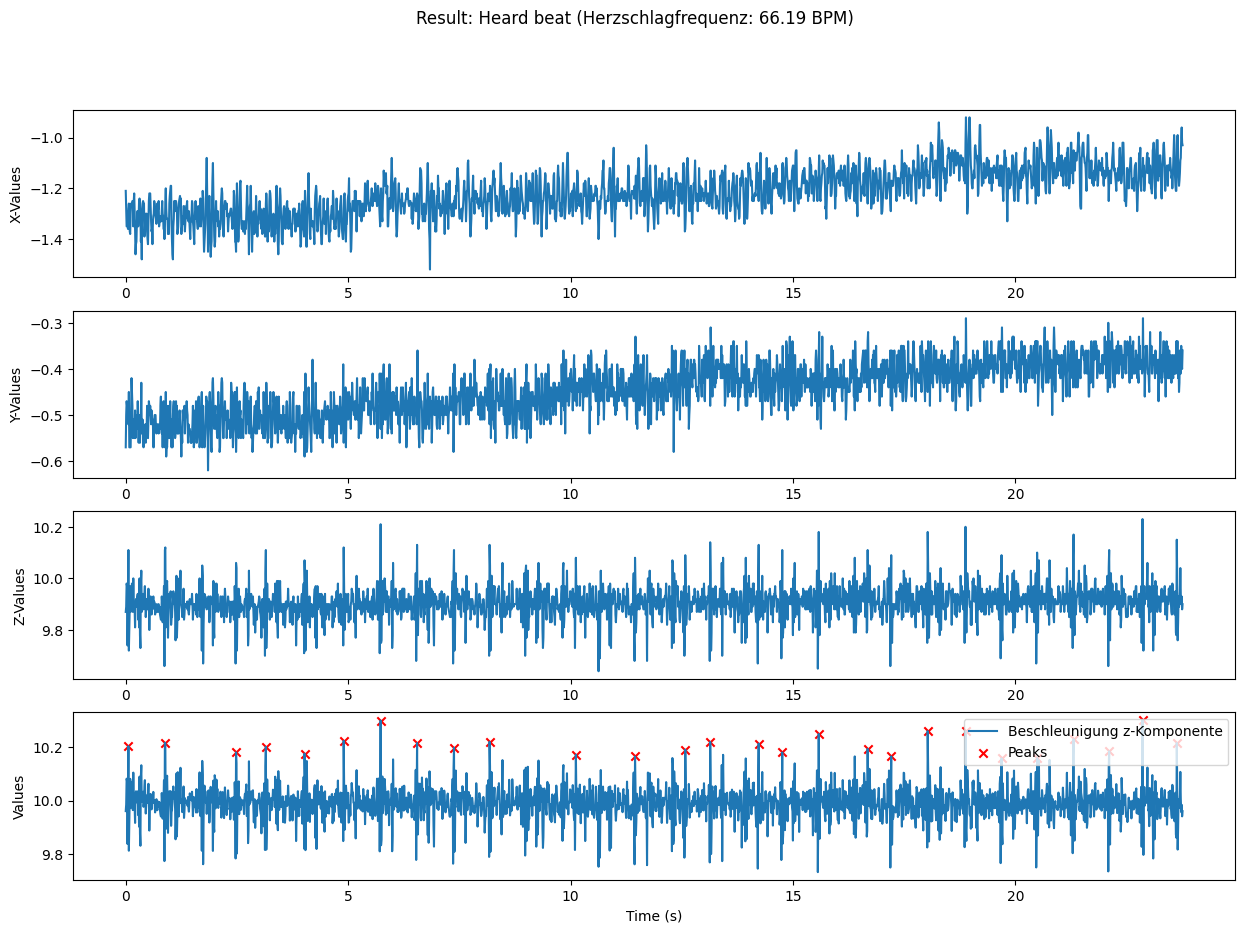

In [20]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file
data = pd.read_csv('v1_herz_1.csv')

# X, Y, Z-Werte aus der CSV-Datei extrahieren
x_values = data['X']
y_values = data['Y']
z_values = data['Z']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

# Beschleunigungsmagnitude berechnen
acceleration = np.sqrt(x_values**2 + y_values**2 + z_values**2)

# Peaks in der normalisierten z-Komponente finden
peaks, _ = find_peaks(acceleration, height=10.15, distance=50)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Herzschlagfrequenz in BPM (Beats Per Minute) berechnen
heartbeats = 60 / np.mean(time_diffs)

# Plot erstellen
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,10))
fig.suptitle(f'Result: Heard beat (Herzschlagfrequenz: {heartbeats:.2f} BPM)')

ax1.plot(time_series, x_values)
ax1.set_ylabel('X-Values')

ax2.plot(time_series, y_values)
ax2.set_ylabel('Y-Values')

ax3.plot(time_series, z_values)
ax3.set_ylabel('Z-Values')

ax4.plot(time_series, acceleration, label='Beschleunigung z-Komponente')
ax4.scatter(time_series[peaks], acceleration.iloc[peaks], c='r', marker='x', label='Peaks')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Values')
ax4.legend()

# Diagramm anzeigen
plt.show()

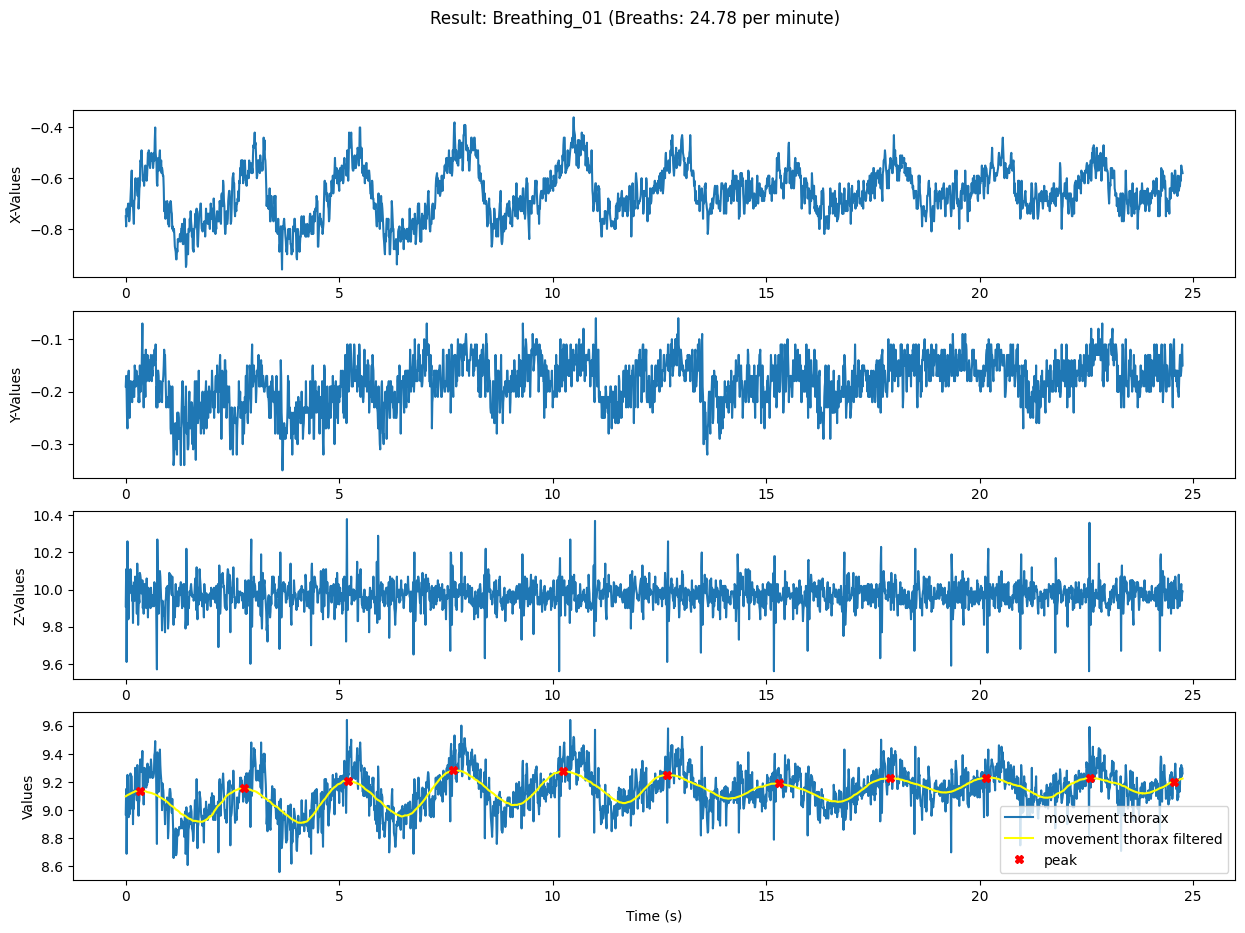

In [21]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file
data = pd.read_csv('v1_atmung_1.csv')

# X, Y, Z-Werte aus der CSV-Datei extrahieren
x_values = data['X']
y_values = data['Y']
z_values = data['Z']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

O = x_values + y_values + z_values

sgf = signal.savgol_filter(O, window_length=250, polyorder=2, mode="nearest")
peaks, _ = find_peaks(sgf,  height=9.1, distance=125)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Create a figure and set its size to 15x5 in.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,10))
fig.suptitle(f'Result: Breathing_01 (Breaths: {breaths:.2f} per minute)')

ax1.plot(time_series, x_values)
ax1.set_ylabel('X-Values')

ax2.plot(time_series, y_values)
ax2.set_ylabel('Y-Values')

ax3.plot(time_series, z_values)
ax3.set_ylabel('Z-Values')

# Plot a line chart
ax4.plot(time_series, O, label='movement thorax')
ax4.plot(time_series, sgf, label='movement thorax filtered', color="yellow")
ax4.plot(time_series[peaks], sgf[peaks], 'X', label='peak', color='red')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Values')
ax4.legend()

# Show plot
plt.show()

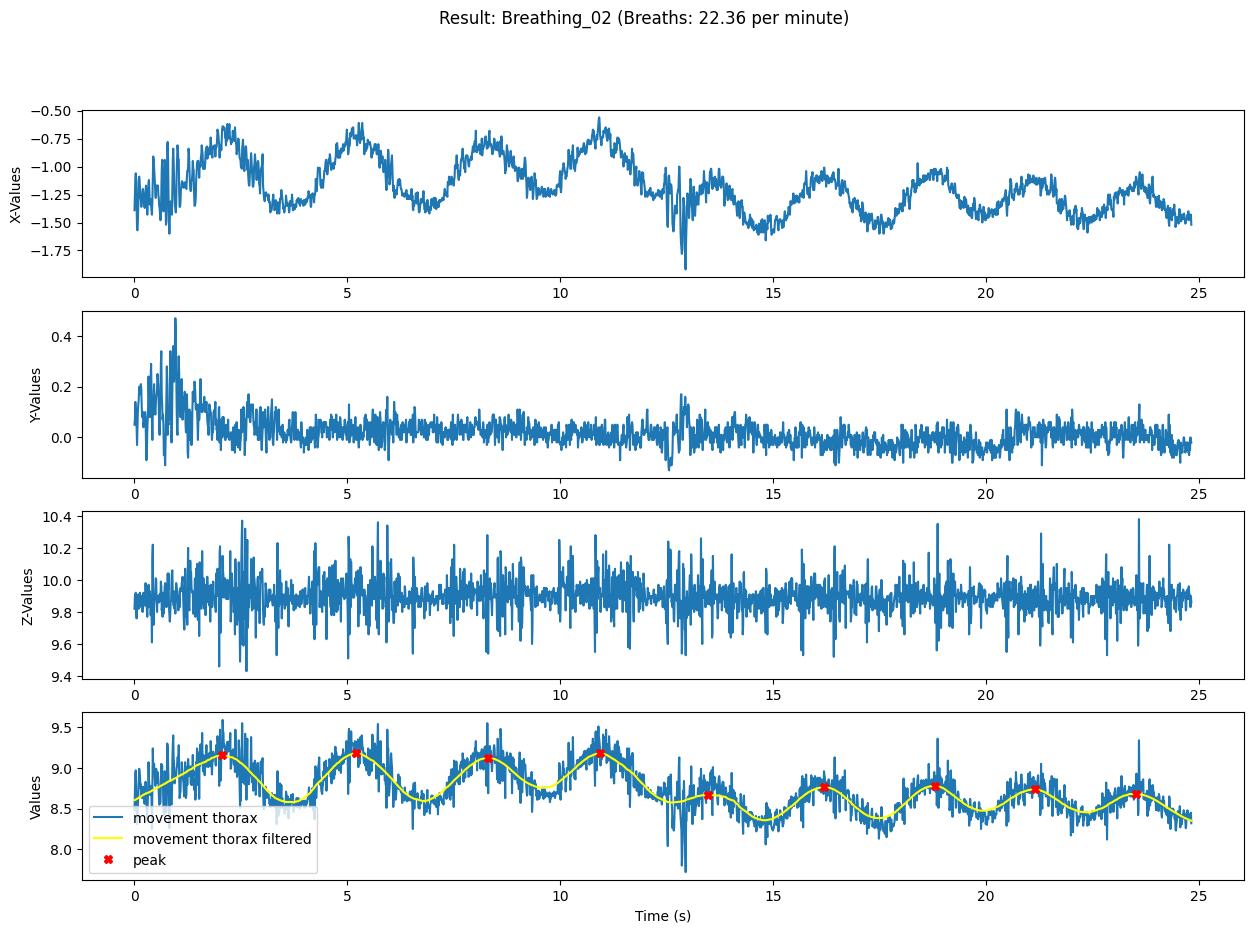

In [23]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file
data = pd.read_csv('v1_atmung_2.csv') # , nrows=1000

# X, Y, Z-Werte aus der CSV-Datei extrahieren
x_values = data['X']
y_values = data['Y']
z_values = data['Z']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

r = x_values + y_values + z_values

sgf = signal.savgol_filter(r, window_length=250, polyorder=2, mode="nearest")
peaks, _ = find_peaks(sgf, distance=200)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Ausgabe erzeugen
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,10))
fig.suptitle(f'Result: Breathing_02 (Breaths: {breaths:.2f} per minute)')

ax1.plot(time_series, x_values)
ax1.set_ylabel('X-Values')

ax2.plot(time_series, y_values)
ax2.set_ylabel('Y-Values')

ax3.plot(time_series, z_values)
ax3.set_ylabel('Z-Values')

ax4.plot(time_series, r, label='movement thorax')
ax4.plot(time_series, sgf, label='movement thorax filtered', color="yellow")
ax4.plot(time_series[peaks], sgf[peaks], 'X', label='peak', color='red')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Values')
ax4.legend()

# Show plot
plt.show()